<a href="https://colab.research.google.com/github/pchernic/python_for_financial_data/blob/main/Calculating_Max_Drawdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Max DD Python

In [4]:
pip install mplcyberpunk


## Libs

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
import mplcyberpunk

## for a stock

In [39]:
FINAL = dt.datetime.now()
START = FINAL - dt.timedelta(days=1500)
STOCK = "AAPL"
price = yf.download(STOCK, START, FINAL)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [40]:
price_max = price.cummax()
drawdowns = (price - price_max)/price_max
drawndown_max = drawdowns.min()
print(drawndown_max)

-0.3142725827060598


In [41]:
drawdowns.head(50)

Date
2019-09-10    0.000000
2019-09-11    0.000000
2019-09-12   -0.002236
2019-09-13   -0.021647
2019-09-16   -0.016503
2019-09-17   -0.012925
2019-09-18   -0.003667
2019-09-19   -0.011763
2019-09-20   -0.026209
2019-09-23   -0.021781
2019-09-24   -0.026432
2019-09-25   -0.011449
2019-09-26   -0.016548
2019-09-27   -0.021333
2019-09-30    0.000000
2019-10-01    0.000000
2019-10-02   -0.025068
2019-10-03   -0.016786
2019-10-04    0.000000
2019-10-07    0.000000
2019-10-08   -0.011715
2019-10-09   -0.000132
2019-10-10    0.000000
2019-10-11    0.000000
2019-10-14   -0.001439
2019-10-15   -0.003768
2019-10-16   -0.007790
2019-10-17   -0.003937
2019-10-18    0.000000
2019-10-21    0.000000
2019-10-22   -0.002287
2019-10-23    0.000000
2019-10-24    0.000000
2019-10-25    0.000000
2019-10-28    0.000000
2019-10-29   -0.023128
2019-10-30   -0.023248
2019-10-31   -0.001165
2019-11-01    0.000000
2019-11-04    0.000000
2019-11-05   -0.001437
2019-11-06   -0.001010
2019-11-07    0.000000
2019-1

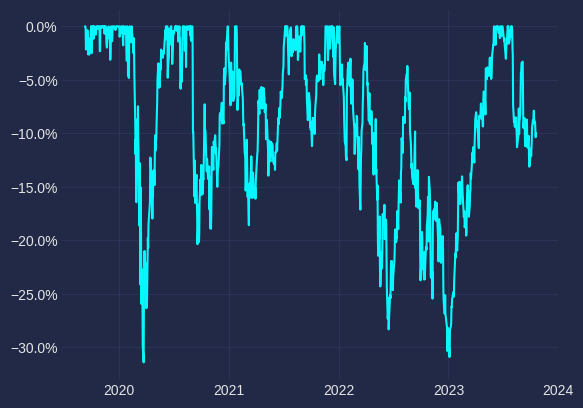

In [42]:
plt.style.use("cyberpunk")

fig, ax = plt.subplots()
ax.plot(drawdowns.index, drawdowns)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_locator(mdate.YearLocator(1))
plt.show()

#In a Portfolio

[*********************100%%**********************]  5 of 5 completed


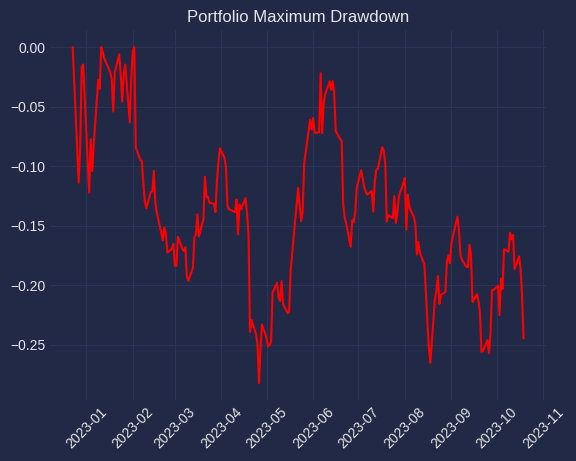

In [35]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define your list of stock symbols
stocks = ['AAPL', 'TSLA', 'AMD', 'AMZN', 'GOOGL']

# Define your date range
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(days=300)

# Download data for all stocks
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate drawdowns for each stock
prices_max = data.cummax()
drawdowns = (data - prices_max) / prices_max

# Calculate the maximum drawdown for the entire portfolio
portfolio_drawdown = drawdowns.min(axis=1)

# Plot the portfolio drawdown with rotated x-axis labels
plt.style.use("cyberpunk")
fig, ax = plt.subplots()
ax.plot(portfolio_drawdown.index, portfolio_drawdown, color='r')
ax.set_title("Portfolio Maximum Drawdown")

# Rotate the x-axis labels for better formatting
plt.xticks(rotation=45)

plt.show()
